<a href="https://colab.research.google.com/github/kkrusere/EV_Market-Analysis-and-Consumer-Behavior/blob/main/EV-Market_Analysis-%26-Consumer_Behavior.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **<center> Electric Vehicle (EV) Market Analysis and Consumer Behavior </center>**

<center> <em>Understanding the EV Market Share, Growth & Trends, Vehicle Components' Supply Chain, Charging Infrastructure, Consumer Preferences, Pros & Cons, and Adoption Barriers</em></center>

<center><img src="https://github.com/kkrusere/EV_Market-Analysis-and-Consumer-Behavior/blob/main/assets/ev-eda-analysis.png?raw=1" width=600/></center>


##### **Introduction**

The electric vehicle (EV) market has experienced significant growth over the last decade, driven by environmental concerns, government policies, and advances in technology. However, the widespread adoption of EVs faces several challenges, including supply chain constraints, charging infrastructure limitations, and consumer reluctance. This project aims to provide a comprehensive analysis of the current EV market, supply chain dynamics, and consumer behaviors while presenting a neutral view of the advantages and disadvantages of EV adoption.



##### **Objectives:**
1. **EV Market Trends (2015-2030):** Analyze global EV market share and growth patterns from 2015 to 2030.
2. **Supply Chain Analysis:** Investigate the EV supply chain with a focus on critical components such as batteries and semiconductors, and highlight existing bottlenecks and projected future challenges over the period.
3. **Charging Infrastructure Growth (2015-2030):** Evaluate the growth and development of EV charging infrastructure during this period, identifying geographic disparities and potential gaps in future infrastructure needs.
4. **Consumer Preferences:** Assess evolving consumer preferences and barriers to adoption, such as cost, range anxiety, and environmental concerns, examining shifts from 2015 to projected trends in 2030.
5. **Pros & Cons:** Provide a balanced analysis of the advantages (e.g., environmental sustainability) and disadvantages (e.g., high initial costs) of EV adoption, considering both past trends and future projections.
6. **Prescriptive Insights (2015-2030):** Offer data-driven recommendations for policymakers and industry stakeholders to overcome key barriers to adoption and support the continued growth of the EV market through to 2030.


This notebook will apply a combination of descriptive, predictive, prescriptive, and geospatial analysis to achieve the outlined objectives. Data is drawn from industry reports, market research, and publicly available sources. The aim is to provide data-driven insights that can assist stakeholders—including governments, manufacturers, and consumers—in understanding the current state of the EV market and identifying potential strategies for its continued development.

In [1]:
from google.colab import drive, userdata
import os
import json
#mounting google drive
drive.mount('/content/drive')

########################################

#changing the working directory
os.chdir("/content/drive/MyDrive/EV_Data")

!pwd

import warnings
warnings.filterwarnings('ignore')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/EV_Data


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# For interactive plots (optional)
%matplotlib inline

# Set seaborn style
sns.set(style='whitegrid')

The dataset in we are going to look at is sourced from the  [IEA Global EV Data 2024](https://www.iea.org/data-and-statistics/data-tools/global-ev-data-explorer)
, provides a comprehensive view of the electric vehicle (EV) landscape across various regions and timeframes. It combines historical data with projections to analyze trends in EV stock, sales, charging infrastructure, and energy demand.

**Key elements include:**

> - **Regions:** Countries and global segments where data is captured.
> - **Category:** Historical data and projections (e.g., STEPS and APS).
> - **Parameters:** EV-related metrics like sales share, stock share, electricity demand, and oil displacement.
> - **Modes:** Vehicle types, including cars, buses, vans, and trucks.
> - **Powertrain:** Types of powertrains, including BEV (Battery Electric Vehicle), PHEV (Plug-in Hybrid Electric Vehicle), and others.
> - **Years:** Spanning from 2010 to 2035, highlighting both past data and future projections.
> - **Units:** Measurement types, ranging from percentage to vehicles, charging points, and energy consumption (GWh, million barrels per day).

This dataset serves as a foundational tool for analyzing global EV trends, market growth, energy demands, and the transition to electric mobility up to 2035.

##### Loading the data

In [3]:
df_ev_data = pd.read_csv('IEA Global EV Data 2024.csv')
df_ev_data.head()

,region,category,parameter,mode,powertrain,year,unit,value
0,Australia,Historical,EV stock share,Cars,EV,2011,percent,0.00039
1,Australia,Historical,EV sales share,Cars,EV,2011,percent,0.00650
2,Australia,Historical,EV sales,Cars,BEV,2011,Vehicles,49.00000
3,Australia,Historical,EV stock,Cars,BEV,2011,Vehicles,49.00000
4,Australia,Historical,EV stock,Cars,BEV,2012,Vehicles,220.00000


In [4]:
# Below printed  out unique values in the column 'region','category','parameter',	'mode', 'powertrain'	'year','unit'

print("Unique values in 'region':", df_ev_data['region'].unique())
print("Unique values in 'category':", df_ev_data['category'].unique())
print("Unique values in 'parameter':", df_ev_data['parameter'].unique())
print("Unique values in 'mode':", df_ev_data['mode'].unique())
print("Unique values in 'powertrain':", df_ev_data['powertrain'].unique())
print("Unique values in 'year':", df_ev_data['year'].unique())
print("Unique values in 'unit':", df_ev_data['unit'].unique())

Unique values in 'region': ['Australia' 'Austria' 'Belgium' 'Brazil' 'Bulgaria' 'Canada' 'Chile'
 'China' 'Colombia' 'Costa Rica' 'Croatia' 'Cyprus' 'Czech Republic'
 'Denmark' 'Estonia' 'EU27' 'Europe' 'Finland' 'France' 'Germany' 'Greece'
 'Hungary' 'Iceland' 'India' 'Indonesia' 'Ireland' 'Israel' 'Italy'
 'Japan' 'Korea' 'Latvia' 'Lithuania' 'Luxembourg' 'Mexico' 'Netherlands'
 'New Zealand' 'Norway' 'Poland' 'Portugal' 'Rest of the world' 'Romania'
 'Seychelles' 'Slovakia' 'Slovenia' 'South Africa' 'Spain' 'Sweden'
 'Switzerland' 'Thailand' 'Turkiye' 'United Arab Emirates'
 'United Kingdom' 'USA' 'World']
Unique values in 'category': ['Historical' 'Projection-STEPS' 'Projection-APS']
Unique values in 'parameter': ['EV stock share' 'EV sales share' 'EV sales' 'EV stock'
 'EV charging points' 'Electricity demand' 'Oil displacement Mbd'
 'Oil displacement, million lge']
Unique values in 'mode': ['Cars' 'EV' 'Buses' 'Vans' 'Trucks']
Unique values in 'powertrain': ['EV' 'BEV' 'PHEV' 'Pu

In [5]:
df_ev_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12654 entries, 0 to 12653
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   region      12654 non-null  object 
 1   category    12654 non-null  object 
 2   parameter   12654 non-null  object 
 3   mode        12654 non-null  object 
 4   powertrain  12654 non-null  object 
 5   year        12654 non-null  int64  
 6   unit        12654 non-null  object 
 7   value       12654 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 791.0+ KB


1.1 Handling Missing Values
 - First, we check for missing values in the DataFrame:

In [6]:
# Check for missing values
print(df_ev_data.isnull().sum())


region        0
category      0
parameter     0
mode          0
powertrain    0
year          0
unit          0
value         0
dtype: int64


1.2 Standardizing Text Data

 - Ensure consistency in text data by converting all text to lowercase and stripping whitespace:

In [7]:
# Convert text columns to lowercase and strip whitespace
text_columns = ['region', 'category', 'parameter', 'mode', 'powertrain', 'unit']
for col in text_columns:
    df_ev_data[col] = df_ev_data[col].str.lower().str.strip()


1.3 Correcting Inconsistencies in 'region'

 - Check for inconsistent region names:

In [8]:
# For example, standardizing country names
df_ev_data['region'] = df_ev_data['region'].replace({
    'usa': 'united states',
    'eu27': 'european union',
    'turkiye': 'turkey',
})


1.4 Converting Data Types
 - Ensuring that numeric columns are correctly typed:

In [9]:
# Convert 'year' to integer
df_ev_data['year'] = df_ev_data['year'].astype(int)

# 'value' to float64
df_ev_data['value'] = df_ev_data['value'].astype(float)


1.5 Handling Duplicates

 - Checking and removing duplicate rows:

In [10]:
# Checking for duplicates
duplicate_rows = df_ev_data[df_ev_data.duplicated()]
print("Number of duplicate rows:", duplicate_rows.shape[0])

# Remove duplicates
df_ev_data = df_ev_data.drop_duplicates()


Number of duplicate rows: 0


In [11]:
# renaming columns
df_ev_data.rename(columns={
    'region': 'Region',
    'category': 'Category',
    'parameter': 'Parameter',
    'mode': 'Mode',
    'powertrain': 'Powertrain',
    'year': 'Year',
    'unit': 'Unit',
    'value': 'Value'
}, inplace=True)


1.6 Handling Units and Conversions

 - Ensure that units are consistent for each parameter:

In [12]:
# # Check units for each parameter
# print(df_ev_data.groupby(['Parameter', 'Unit']).size())

# # If necessary, convert units to standardize (e.g., million to units)
# # Example for 'Oil displacement, million lge':
# df_ev_data.loc[df_ev_data['Unit'] == 'oil displacement, million lge', 'Value'] *= 1_000_000
# df_ev_data.loc[df_ev_data['Unit'] == 'oil displacement, million lge', 'Unit'] = 'oil displacement, lge'


1.7 Pivoting Data for Analysis

 - Reshape the DataFrame to facilitate analysis:

In [13]:
# Pivoting the data to have years as rows and regions as columns for a specific parameter
pivot_table = df_ev_data.pivot_table(
    index='Year',
    columns='Region',
    values='Value',
    aggfunc='sum'
)


In [14]:
# droping rows
powertrain_exclude = ['ev', 'publicly available fast', 'publicly available slow', 'fcev']

for value in powertrain_exclude:
  df_ev_data = df_ev_data[df_ev_data.Powertrain != value]

df_ev_data = df_ev_data[df_ev_data.Mode != 'ev']

In [15]:
# Fixing the typo in the 'Unit' column
# There is a typo in the Unit column: 'milion barrels per day' should be 'million barrels per day'
df_ev_data['Unit'] = df_ev_data['Unit'].replace({
    'milion barrels per day': 'million barrels per day'
})

# Renaming 'world' to 'global' and removing 'rest of the world'
# There are some redundant or ambiguous region names like 'world' and 'rest of the world'.
df_ev_data['Region'] = df_ev_data['Region'].replace({
    'world': 'global'
})
df_ev_data = df_ev_data[df_ev_data['Region'] != 'rest of the world']

# Keeping relevant parameters
# For EV market share and trends analysis, we'll focus on  key parameters ev sales, ev stock, ev sales share, and ev stock share.
relevant_parameters = ['ev sales', 'ev stock', 'ev sales share', 'ev stock share']
df_ev_data = df_ev_data[df_ev_data['Parameter'].isin(relevant_parameters)]



In [16]:
# Filter data for years between 2015 and 2030 (inclusive)
df_ev_data = df_ev_data[(df_ev_data['Year'] >= 2015) & (df_ev_data['Year'] <= 2030)]


In [17]:
df_ev_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3931 entries, 22 to 12535
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Region      3931 non-null   object 
 1   Category    3931 non-null   object 
 2   Parameter   3931 non-null   object 
 3   Mode        3931 non-null   object 
 4   Powertrain  3931 non-null   object 
 5   Year        3931 non-null   int64  
 6   Unit        3931 non-null   object 
 7   Value       3931 non-null   float64
dtypes: float64(1), int64(1), object(6)
memory usage: 276.4+ KB


#### **Exploratory Data Analysis (EDA)**

In [18]:
# EV Sales
ev_sales = df_ev_data[df_ev_data['Parameter'] == 'ev sales']
# EV Stock
ev_stock = df_ev_data[df_ev_data['Parameter'] == 'ev stock']

**Distribution of EV Sales and Stock** : Analyzing the distribution of EV sales and stock values.

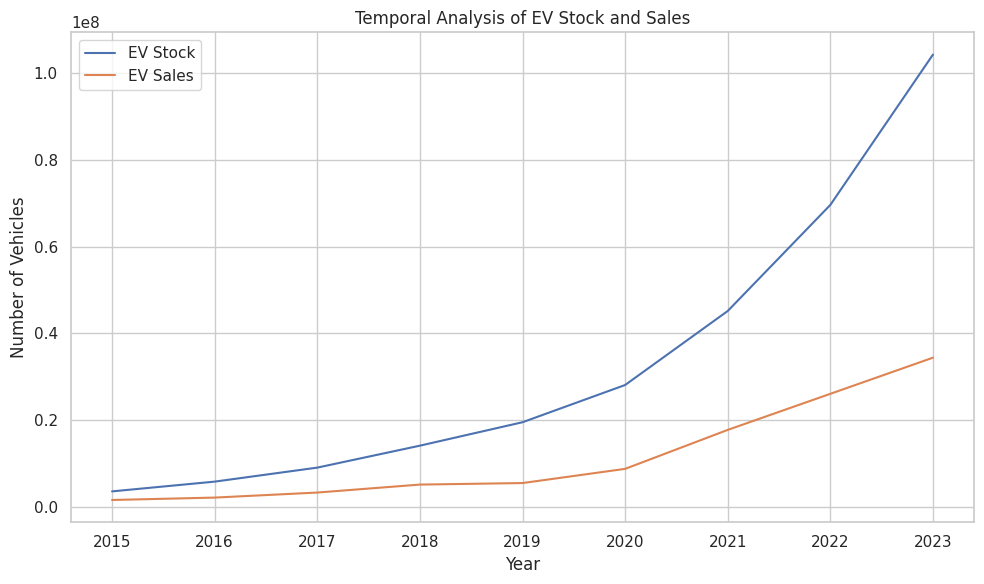

In [19]:
# Filtering data for EV stock and sales
ev_stock_hist = df_ev_data[(df_ev_data['Parameter'] == 'ev stock') & (df_ev_data['Category'] == 'historical')]
ev_sales_hist = df_ev_data[(df_ev_data['Parameter'] == 'ev sales') & (df_ev_data['Category'] == 'historical')]

# Grouping data by year and calculate total EV stock and sales for each year
ev_stock_yearly = ev_stock_hist.groupby('Year')['Value'].sum()
ev_sales_yearly = ev_sales_hist.groupby('Year')['Value'].sum()


plt.figure(figsize=(10, 6))

plt.plot(ev_stock_yearly.index, ev_stock_yearly.values, label='EV Stock')
plt.plot(ev_sales_yearly.index, ev_sales_yearly.values, label='EV Sales')

plt.title('Temporal Analysis of EV Stock and Sales')
plt.xlabel('Year')
plt.ylabel('Number of Vehicles')
plt.legend()
plt.grid(True)

plt.xticks(ev_stock_yearly.index)
plt.tight_layout()
plt.show()



The total number of EVs on the road, or the cumulative stock, shows significant growth from 2015 to 2023. Growth appears to be exponential, with a sharp increase especially from 2020 onwards. In 2023, the total EV stock crosses 100 million vehicles, showing a rapid global adoption of EVs in the past few years. EV sales are increasing steadily but at a slower rate than the stock accumulation. Between 2015 and 2019, the growth in sales is moderate. From 2020 onward, sales exhibit stronger growth, although the slope is still less steep compared to the stock (which might be an indicator of the adoption rate).The year 2023 shows the highest sales figure in the period, with the sales approaching 40 million units. The EV market is experiencing rapid growth, with both stock and sales increasing significantly.
The rate of growth is accelerating, indicating a strong momentum in the market. This trend is likely to continue in the foreseeable future, though external factors could influence the growth trajectory. we will take a look at the


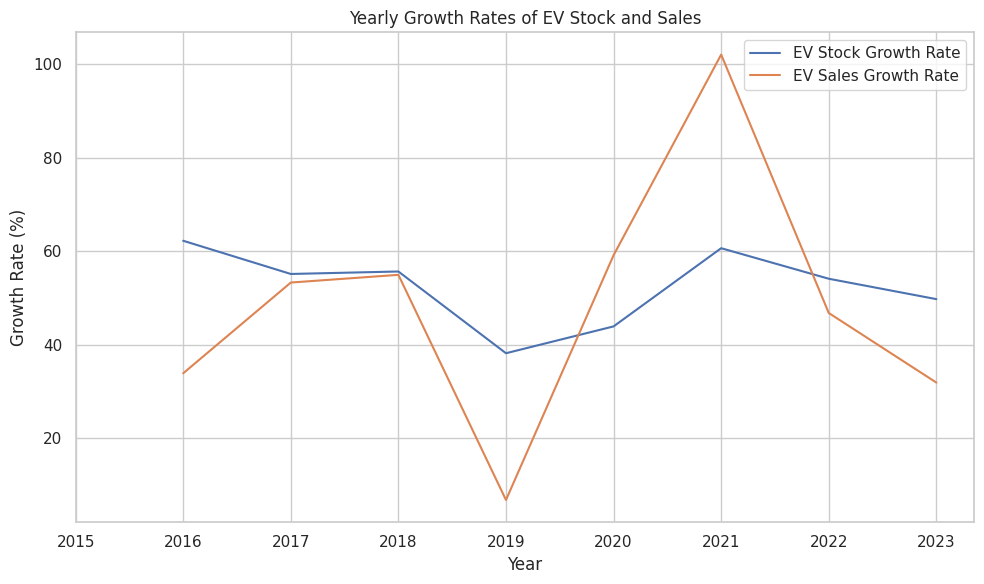

In [20]:
# Yearly Growth Rates
ev_stock_yearly_growth = ev_stock_yearly.pct_change() * 100
ev_sales_yearly_growth = ev_sales_yearly.pct_change() * 100

plt.figure(figsize=(10, 6))
plt.plot(ev_stock_yearly_growth.index, ev_stock_yearly_growth.values, label='EV Stock Growth Rate')
plt.plot(ev_sales_yearly_growth.index, ev_sales_yearly_growth.values, label='EV Sales Growth Rate')
plt.title('Yearly Growth Rates of EV Stock and Sales')
plt.xlabel('Year')
plt.ylabel('Growth Rate (%)')
plt.legend()
plt.grid(True)
plt.xticks(ev_stock_yearly_growth.index)
plt.tight_layout()
plt.show()

Side-by-Side YoY Growth Plots for EV Sales and EV Stock

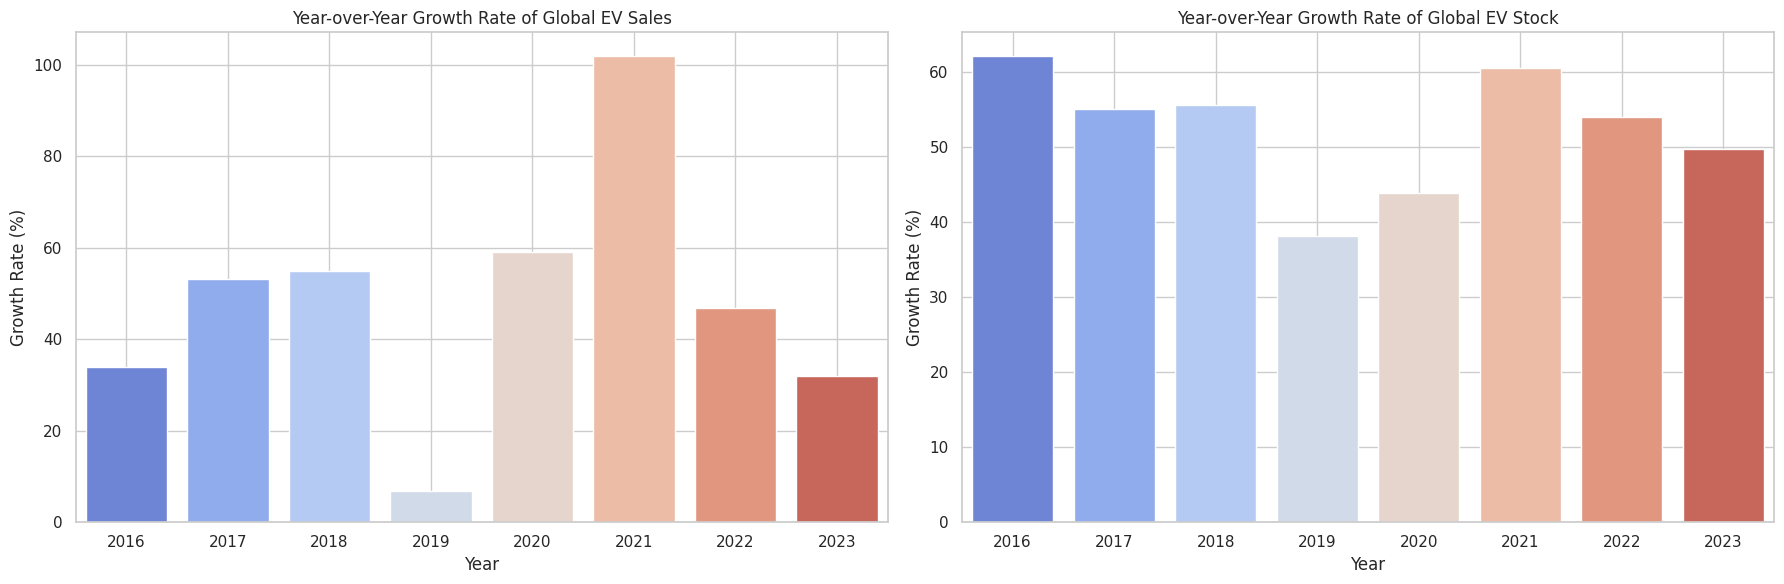

In [21]:
# EV Sales: Calculate YoY Growth
historical_sales_yearly = ev_sales_hist.groupby('Year')['Value'].sum().reset_index()
historical_sales_yearly['YoY_Growth'] = historical_sales_yearly['Value'].pct_change() * 100

# EV Stock: Calculate YoY Growth
historical_stock_yearly = ev_stock_hist.groupby('Year')['Value'].sum().reset_index()
historical_stock_yearly['YoY_Growth'] = historical_stock_yearly['Value'].pct_change() * 100

# Create side-by-side plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6), sharey=False)

# Plot for EV Sales YoY Growth
sns.barplot(data=historical_sales_yearly.dropna(), x='Year', y='YoY_Growth', palette='coolwarm', ax=ax1)
ax1.set_title('Year-over-Year Growth Rate of Global EV Sales')
ax1.set_xlabel('Year')
ax1.set_ylabel('Growth Rate (%)')
ax1.grid(True)

# Plot for EV Stock YoY Growth
sns.barplot(data=historical_stock_yearly.dropna(), x='Year', y='YoY_Growth', palette='coolwarm', ax=ax2)
ax2.set_title('Year-over-Year Growth Rate of Global EV Stock')
ax2.set_xlabel('Year')
ax2.set_ylabel('Growth Rate (%)')
ax2.grid(True)


plt.tight_layout()
plt.show()

The above chart contains two bar charts displaying the year-over-year growth rates for global electric vehicle (EV) sales and EV stock from 2016 to 2023. For the Year-over-Year Growth Rate of Global EV Sales (Left Chart), the growth rate fluctuates significantly across the year. **2016-2018**, there is a steady increase in the growth rate is observed, with growth rates between 40% and 60%. The **2019** growth rate drops significantly to a low point, indicating a potential slowdown in sales growth during that year. there is a recovery in **2020** is evident as the growth rate rises back up. There is a peak growth rate in **2021**, with sales increasing by over 100%, indicating a massive spike in global EV sales. This could be attributed to several factors like increased consumer demand, government incentives, and an expansion in available EV models, and maybe Covid19 as the world was emerging/recovering from the pandemic. **2022-2023** has the growth rate decline but remains substantial, around 30%-40%. Though it's a drop from 2021's peak, it still reflects strong market growth.

Year-over-Year Growth Rate of Global EV Stock (Right Chart), has **2016-2018** with a growth rate of EV stock being consistently high, around 50%-60%. There's a noticeable decline in stock growth in **2019**, dipping to around 30%, possibly reflecting the slower sales growth observed in the left chart for the same year. The stock growth recovers in the **2020-2021**. The growth rate moderates, settling between **20%-30%**, maybe reflecting a stabilization as the as the world recovers from Covid19 and EV market matures. Even though the stock continues to grow, it does so at a slower pace compared to the earlier years.

Projection Analysis
**Comparing Historical Data with Projections:** Separate historical data and projections for analysis.

`"Projection-STEPS"` and `"Projection-APS"`

STEPS - Stated Policies Scenario <br>
APS - Announced Pledges Scenario



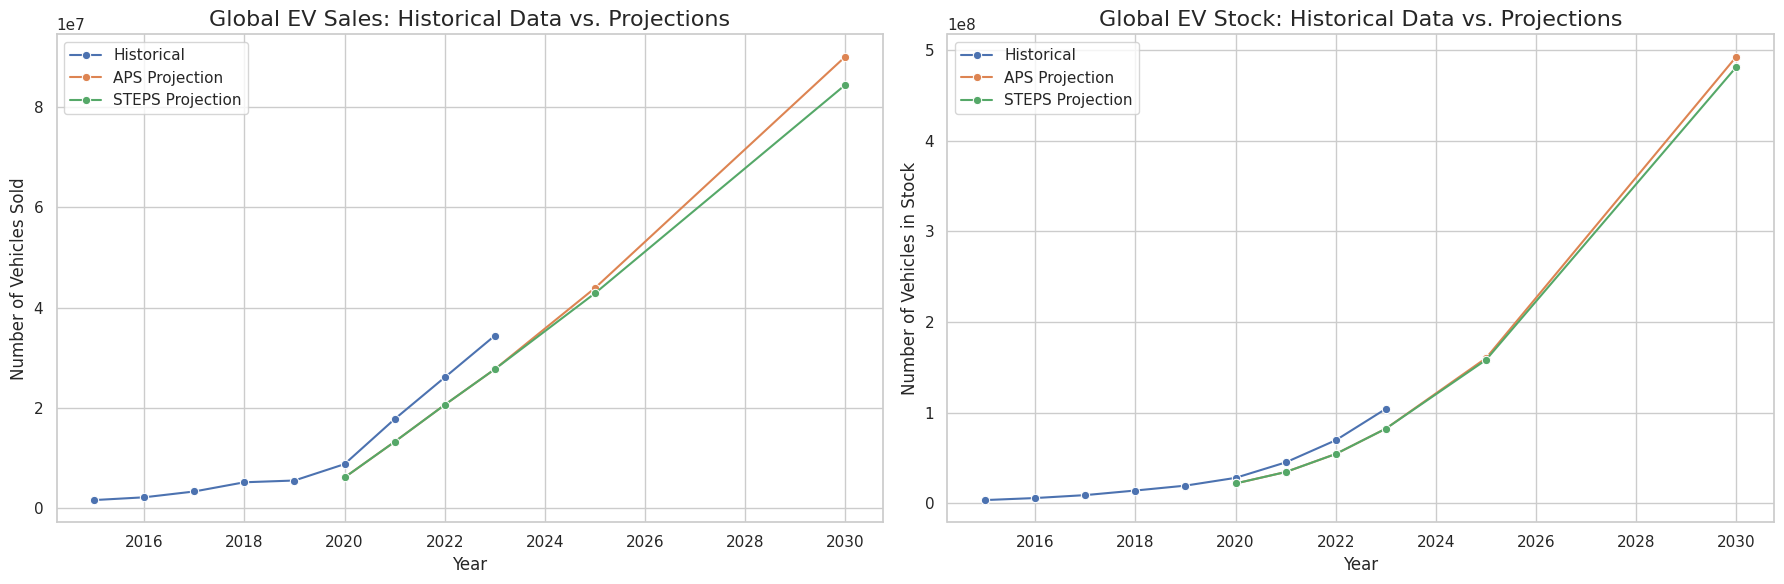

In [22]:
# Filter historical and projection data for EV Sales
historical_sales = ev_sales[ev_sales['Category'] == 'historical']
aps_projections_sales = ev_sales[ev_sales['Category'] == 'projection-aps']
steps_projections_sales = ev_sales[ev_sales['Category'] == 'projection-steps']

# Filter historical and projection data for EV Stock
historical_stock = ev_stock[ev_stock['Category'] == 'historical']
aps_projections_stock = ev_stock[ev_stock['Category'] == 'projection-aps']
steps_projections_stock = ev_stock[ev_stock['Category'] == 'projection-steps']

# Create side-by-side plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6), sharey=False)

# Plot for EV Sales: Historical and Projections
sns.lineplot(data=historical_sales.groupby('Year')['Value'].sum().reset_index(),
             x='Year', y='Value', label='Historical', marker='o', ax=ax1)
sns.lineplot(data=aps_projections_sales.groupby('Year')['Value'].sum().reset_index(),
             x='Year', y='Value', label='APS Projection', marker='o', ax=ax1)
sns.lineplot(data=steps_projections_sales.groupby('Year')['Value'].sum().reset_index(),
             x='Year', y='Value', label='STEPS Projection', marker='o', ax=ax1)

# Configure plot titles and labels for EV Sales
ax1.set_title('Global EV Sales: Historical Data vs. Projections', fontsize=16)
ax1.set_xlabel('Year', fontsize=12)
ax1.set_ylabel('Number of Vehicles Sold', fontsize=12)
ax1.legend()
ax1.grid(True)

# Plot for EV Stock: Historical and Projections
sns.lineplot(data=historical_stock.groupby('Year')['Value'].sum().reset_index(), x='Year', y='Value', label='Historical', marker='o', ax=ax2)
sns.lineplot(data=aps_projections_stock.groupby('Year')['Value'].sum().reset_index(), x='Year', y='Value', label='APS Projection', marker='o', ax=ax2)
sns.lineplot(data=steps_projections_stock.groupby('Year')['Value'].sum().reset_index(), x='Year', y='Value', label='STEPS Projection', marker='o', ax=ax2)

# Configure plot titles and labels for EV Stock
ax2.set_title('Global EV Stock: Historical Data vs. Projections', fontsize=16)
ax2.set_xlabel('Year', fontsize=12)
ax2.set_ylabel('Number of Vehicles in Stock', fontsize=12)
ax2.legend()
ax2.grid(True)


plt.tight_layout()
plt.show()


The above chart contains two line charts comparing historical data versus projections for global EV sales (left chart) and global EV stock (right chart) from 2015 to 2030. The projections are based on two different scenarios: APS (orange line) and STEPS (green line).


**Left Chart**, Sales exhibit a clear upward trend, with significant growth post-2020, reflecting increased adoption. APS Projection (orange line), APS stands for "Announced Pledges Scenario," and it projects aggressive growth, with global EV sales surpassing 8 million vehicles by 2030. This projection indicates a scenario where global commitments and pledges for sustainability and EV adoption are fully realized. STEPS Projection (green line), STEPS stands for "Stated Policies Scenario," and it projects slightly slower growth, with global EV sales reaching approximately 6 million vehicles by 2030. This scenario assumes that the current policies in place (but not necessarily aggressive new pledges) will drive EV adoption forward.

**Right Chart**, The total EV stock shows consistent growth, especially post-2020, where the cumulative number of EVs on the road increased significantly. APS Projection (orange line), Under this scenario, global EV stock is projected to surpass 500 million vehicles by 2030, indicating rapid adoption and cumulative growth. STEPS Projection (green line), STEPS projection shows a slightly slower growth trajectory, reaching approximately 400 million vehicles by 2030. This projection reflects more conservative estimates based on current policies without additional aggressive commitments.

**Global EV Sales by Powertrain: Historical Data vs. Projections**
- Show global EV sales for each powertrain type, stratified by the projection scenarios (historical, APS, and STEPS).
- Visually comparing how BEV and PHEV sales contribute to the overall trends in each scenario.

In [23]:
# Combine all datasets
historical_sales['Projection'] = 'Historical'
aps_projections_sales['Projection'] = 'APS Projection'
steps_projections_sales['Projection'] = 'STEPS Projection'

# Concatenate the datasets
combined_sales = pd.concat([historical_sales, aps_projections_sales, steps_projections_sales])

# Group by Year, Powertrain, and Projection for Plotly visualization
grouped_sales = combined_sales.groupby(['Year', 'Powertrain', 'Projection'])['Value'].sum().reset_index()

# Plotting using Plotly, stratified by Powertrain
fig = px.line(grouped_sales,
              x='Year',
              y='Value',
              color='Projection',
              line_dash='Powertrain',  # Stratify by powertrain using different line styles
              title='Global EV Sales by Powertrain: Historical Data vs. Projections',
              labels={'Value': 'Number of Vehicles Sold', 'Year': 'Year'},
              template='plotly_white')

# Update layout for better visualization
fig.update_layout(
    xaxis_title="Year",
    yaxis_title="Number of Vehicles Sold",
    legend_title_text='Projection Scenario',
    hovermode="x unified"
)

# Show the interactive plot
fig.show()

Global EV Sales by Powertrain: Historical Data vs. Projections, the BEV sales (solid blue line) have shown a noticeable upward trend since 2020, indicating strong growth, while PHEV sales (dotted blue line) have grown at a slower, steadier rate.
**APS Projection** for BEV sales (solid red line) grow sharply, reaching close to 80 million vehicles sold annually by 2030. This indicates strong policy support for BEV adoption in this scenario. PHEV sales (dotted red line) grow at a much slower pace, only reaching around 10 million by 2030, suggesting that PHEVs are not as heavily favored under this scenario.
The **STEPS Projection** for the BEV sales (solid green line) grow at a slower rate compared to APS but still reach around 60 million vehicles sold annually by 2030, reflecting solid but less aggressive policy support. PHEV sales (dotted green line) grow modestly, similar to APS, with around 10 million vehicles sold annually by 2030.


**Global EV Stock by Powertrain: Historical Data vs. Projections**
- Show global EV stock for each powertrain type, stratified by the projection scenarios (historical, APS, and STEPS).
- Visually comparing how BEV and PHEV stock contribute to the overall trends in each scenario.

In [24]:
# Combine all datasets
historical_stock['Projection'] = 'Historical'
aps_projections_stock['Projection'] = 'APS Projection'
steps_projections_stock['Projection'] = 'STEPS Projection'

# Concatenate the datasets
combined_stock = pd.concat([historical_stock, aps_projections_stock, steps_projections_stock])

# Group by Year, Powertrain, and Projection for Plotly visualization
grouped_stock = combined_stock.groupby(['Year', 'Powertrain', 'Projection'])['Value'].sum().reset_index()

# Plotting using Plotly, stratified by Powertrain
fig = px.line(grouped_stock,
              x='Year',
              y='Value',
              color='Projection',
              line_dash='Powertrain',  # Stratify by powertrain using different line styles
              title='Global EV Stock by Powertrain: Historical Data vs. Projections',
              labels={'Value': 'Number of Vehicles in Stock', 'Year': 'Year'},
              template='plotly_white')

# Update layout for better visualization
fig.update_layout(
    xaxis_title="Year",
    yaxis_title="Number of Vehicles in Stock",
    legend_title_text='Projection Scenario',
    hovermode="x unified"
)

# Show the interactive plot
fig.show()

Global EV Stock by Powertrain: Historical Data vs. Projections, Historical Data show the number of BEVs in stock (solid blue line) increased significantly since 2020, while PHEV stock (dotted blue line) has grown more gradually. The **APS Projection** for the BEV stock (solid red line) is projected to exceed 350 million vehicles by 2030, with a steep and consistent increase. The PHEV stock (dotted red line) grows much more slowly, reaching about 50 million vehicles by 2030, suggesting less policy emphasis on PHEVs.
**STEPS Projection** for the BEV stock (solid green line) grows at a slightly slower pace than in the APS scenario but still reaches about 300 million vehicles by 2030. While the PHEV stock (dotted green line) grows at a similar pace to APS, with a steady but relatively modest increase reaching around 50 million vehicles by 2030.


BEV Dominance in both projections (APS and STEPS) predict that Battery Electric Vehicles (BEVs) will dominate EV sales and stock by 2030, with a much steeper increase compared to PHEVs. PHEV (Plug-in Hybrid Electric Vehicles) have a slower growth, in both projection scenarios,reflecting a potential phase-out or reduced emphasis on hybrids as the market transitions towards full electrification (BEVs). APS assumes stronger policy support for EV adoption, leading to higher sales and stock for BEVs.
STEPS assumes a more moderate trajectory, with slower but still substantial growth in both sales and stock. Overall, the charts highlight the transition towards BEVs as the dominant form of EV, while PHEVs are projected to play a smaller role, with policies influencing the pace of this transition.

Regional Analysis
1. **EV Sales:** Identifying the regions with the highest EV sales

In [25]:
# Sum EV sales by region (using country names compatible with Plotly)
ev_sales_country = ev_sales_hist.groupby('Region')['Value'].sum().reset_index()

# Calculate percentage of global EV sales for hover text
ev_sales_country['Percentage'] = (ev_sales_country['Value'] / ev_sales_country['Value'].sum()) * 100

# Create the choropleth map
fig = px.choropleth(
    ev_sales_country,
    locations='Region',
    locationmode='country names',
    color='Value',
    hover_name='Region',
    hover_data={'Value': True, 'Percentage': ':.2f'},
    color_continuous_scale=px.colors.sequential.Plasma,
    title='Total EV Sales by Country (2015-2023)',
)

# Update layout for better appearance
fig.update_layout(
    geo=dict(showframe=False, showcoastlines=True, coastlinecolor="Black"),
    coloraxis_colorbar=dict(
        title="Total Sales",
        tickprefix='',
        ticks='outside'
    ),
    margin={"r":0,"t":50,"l":0,"b":0},
    title_x=0.5  # Center the title
)

# Show the map
fig.show()

The above shows a world map illustrating total EV sales by country from 2015 to 2023, with a color gradient representing sales volumes.

China is highlighted in red, indicating the highest total EV sales, likely exceeding 25 million units over the 2015-2023 period. China is a global leader in EV adoption, this can be attributed to strong government policies, local manufacturers, and widespread infrastructure. The U.S. is shown in deep purple, indicating significant EV sales, likely around 10-15 million units. The U.S. is a major EV market, driven by automakers like Tesla and increasing consumer demand, although it lags behind China. Several European countries (e.g., Norway, Germany, the Netherlands, the U.K.) also show dark purple shades, indicating robust EV adoption with cumulative sales in the 5-10 million range.
European nations have been strong in EV adoption due to stringent emission regulations and government incentives. Australia, Canada, South Korea, and Japan are also shown with purple shades, indicating medium-level sales.

China leads the world in total EV sales by a significant margin, accounting for a large portion of global EV adoption. Europe and North America regions show strong but varied adoption rates, with some countries leading (like Norway and Germany) while others have relatively slower uptake.
Emerging Markets, countries like Australia, Japan, and South Korea are also significant players, but they have smaller cumulative sales compared to the top markets. The map highlights the disparity in EV adoption across different regions, with China, Europe, and the U.S. being the largest markets for EVs by far.

EV Stock: Identifying the regions with the highest EV stock

In [26]:
# Sum EV stock by region (using country names compatible with Plotly)
ev_stock_country = ev_stock_hist.groupby('Region')['Value'].sum().reset_index()

# Calculate percentage of global EV stock for hover text
ev_stock_country['Percentage'] = (ev_stock_country['Value'] / ev_stock_country['Value'].sum()) * 100

# Create the choropleth map for EV stock
fig = px.choropleth(
    ev_stock_country,
    locations='Region',
    locationmode='country names',
    color='Value',
    hover_name='Region',
    hover_data={'Value': True, 'Percentage': ':.2f'},  # Add percentage in hover text
    color_continuous_scale=px.colors.sequential.Plasma,
    title='Total EV Stock by Country (2015-2023)',
)

# Update layout for better appearance
fig.update_layout(
    geo=dict(showframe=False, showcoastlines=True, coastlinecolor="Black"),
    coloraxis_colorbar=dict(
        title="Total Stock",
        tickprefix='',
        ticks='outside'
    ),
    margin={"r":0,"t":50,"l":0,"b":0},
    title_x=0.5  # Center the title
)

# Show the map
fig.show()



From the above, China and the U.S. clearly dominate the global EV market in terms of both sales and stock, with China leading by a large margin. Europe shows strong cumulative EV stock across multiple countries, reflecting widespread adoption of electric vehicles, likely due to strong regulatory frameworks and incentives. Emerging Markets such as Japan, South Korea, and Australia are also increasing their EV stock, but they still trail behind the leading nations. Many regions in South America, Africa, and parts of Asia have relatively low EV stock, highlighting the unequal pace of EV adoption worldwide.

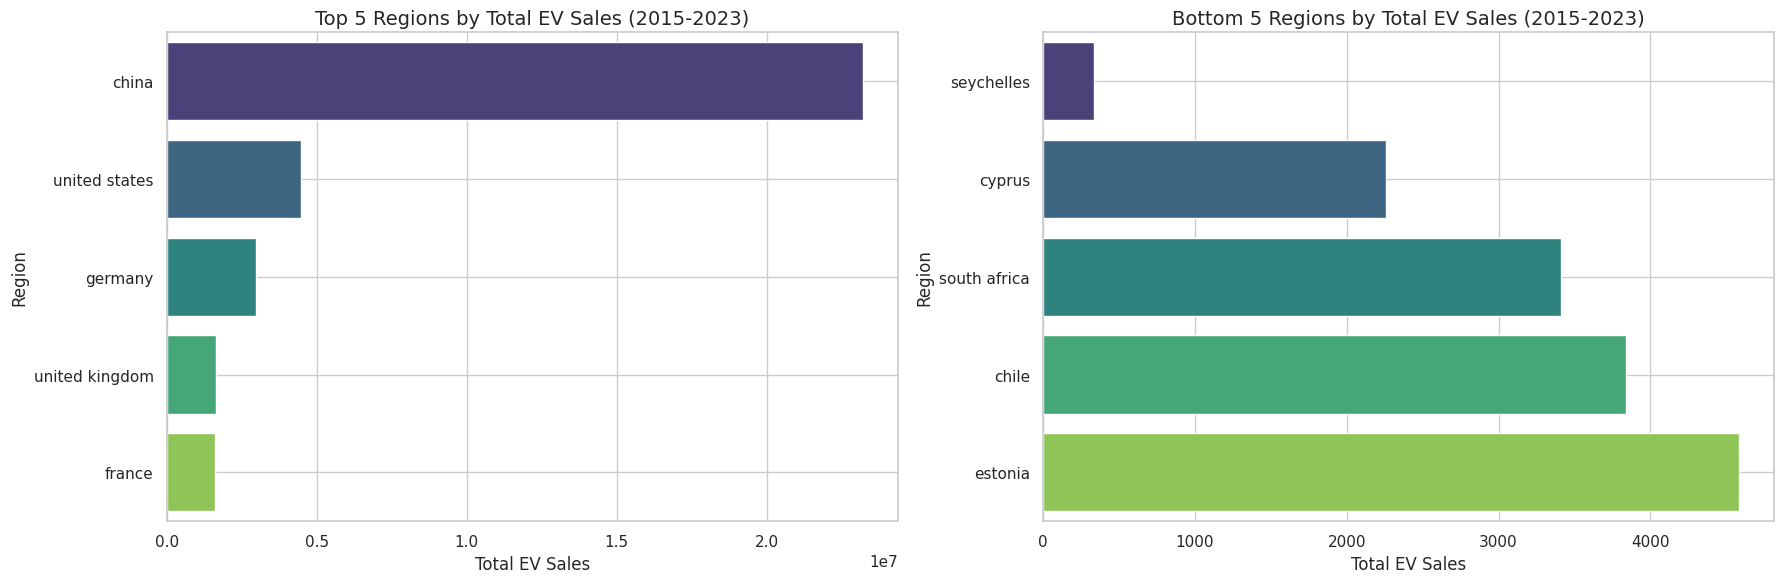

In [27]:
excluded_regions = ['europe', 'european union', 'global']  # List of regions to exclude

# Filter out the excluded regions
historical_sales_filtered = ev_sales_hist[~ev_sales_hist['Region'].isin(excluded_regions)]

# Total EV sales by region
region_ev_sales = historical_sales_filtered.groupby('Region')['Value'].sum().reset_index()

# Top 5 regions by total EV sales
top_5_regions = region_ev_sales.sort_values(by='Value', ascending=False).head(5)

# Bottom 5 regions by total EV sales
bottom_5_regions = region_ev_sales.sort_values(by='Value', ascending=True).head(5)

# Create side-by-side plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6), sharey=False)

# Plot for Top 5 Regions
sns.barplot(data=top_5_regions, x='Value', y='Region', palette='viridis', ax=ax1)
ax1.set_title('Top 5 Regions by Total EV Sales (2015-2023)', fontsize=14)
ax1.set_xlabel('Total EV Sales', fontsize=12)
ax1.set_ylabel('Region', fontsize=12)
ax1.grid(True)

# Plot for Bottom 5 Regions
sns.barplot(data=bottom_5_regions, x='Value', y='Region', palette='viridis', ax=ax2)
ax2.set_title('Bottom 5 Regions by Total EV Sales (2015-2023)', fontsize=14)
ax2.set_xlabel('Total EV Sales', fontsize=12)
ax2.set_ylabel('Region', fontsize=12)
ax2.grid(True)


plt.tight_layout()
plt.show()


Powertrain Analysis
1. **EV Sales by Powertrain Type:** Comparing the total sales of BEVs (Battery Electric Vehicles) and PHEVs (Plug-in Hybrid Electric Vehicles).

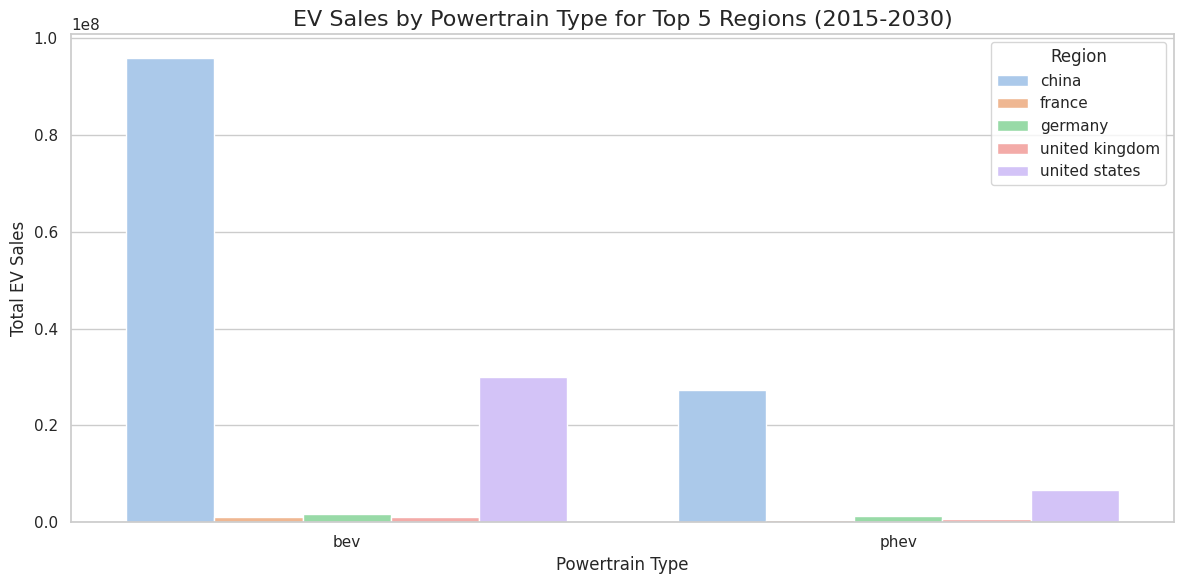

In [31]:
# Total EV sales by region
region_ev_sales = historical_sales_filtered.groupby('Region')['Value'].sum().reset_index()

# Top 5 regions by total EV sales
top_5_regions = region_ev_sales.sort_values(by='Value', ascending=False).head(5)['Region']

# Filter EV sales for the top 5 regions
ev_sales_top_regions = ev_sales[ev_sales['Region'].isin(top_5_regions)]

# EV sales grouped by Powertrain and Region for the top regions
powertrain_sales_top_regions = ev_sales_top_regions.groupby(['Powertrain', 'Region'])['Value'].sum().reset_index()

# Create the plot
plt.figure(figsize=(12,6))
sns.barplot(data=powertrain_sales_top_regions, x='Powertrain', y='Value', hue='Region', palette='pastel')

# Add title and labels
plt.title('EV Sales by Powertrain Type for Top 5 Regions (2015-2030)', fontsize=16)
plt.xlabel('Powertrain Type', fontsize=12)
plt.ylabel('Total EV Sales', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


The chart compares EV sales by powertrain type (BEV vs. PHEV) for the top 5 regions (China, United States, Germany, United Kingdom, and France) from 2015 to 2030. Here’s the breakdown:

For the Battery Electric Vehicles (BEV) Sales, China dominates BEV sales with nearly 100 million vehicles, showing that China is the global leader in fully electric vehicles. United States follows with a moderate level of BEV sales, around 30 million vehicles. Germany, United Kingdom, and France contribute relatively small portions to global BEV sales, each contributing less than 5 million BEVs. This suggests these European nations are increasing their EV adoption but at a slower pace compared to the U.S. and China.

Plug-in Hybrid Electric Vehicles (PHEV) Sales, here, China and the U.S. again dominate also, but the sales are much smaller compared to BEVs. Both countries have between 20 and 30 million PHEVs sold over the period.
Germany shows some PHEV sales, though at a much smaller scale than BEVs. Similarly, the United Kingdom and France contribute minimally to PHEV sales.

China’s focus on Battery Electric Vehicles (BEVs) is clear from the massive lead in BEV sales. This is likely driven by aggressive policy support and a robust domestic manufacturing ecosystem. U.S. shows a solid presence in both BEV and PHEV markets, though still far behind China.

European countries like Germany, the U.K., and France are contributing to both BEV and PHEV markets but at much lower levels compared to China and the U.S., reflecting slower adoption and possibly different consumer preferences or infrastructure readiness. The chart shows that BEVs are the clear focus in global EV adoption, with PHEVs playing a much smaller role in the transition.

In [32]:
excluded_regions = ['europe', 'european union', 'global']  # List of regions to exclude

# Filter out the excluded regions
historical_sales_filtered = historical_sales[~historical_sales['Region'].isin(excluded_regions)]

# Global sales per year
global_sales_yearly = historical_sales_filtered.groupby('Year')['Value'].sum().reset_index().rename(columns={'Value': 'Global_Sales'})

# Merge with regional data
regional_sales = historical_sales_filtered.groupby(['Year', 'Region'])['Value'].sum().reset_index()
regional_sales = pd.merge(regional_sales, global_sales_yearly, on='Year')
regional_sales['Sales_Share'] = (regional_sales['Value'] / regional_sales['Global_Sales']) * 100

# ---  Calculate Average Sales Share and Select Top/Bottom 10 ---
avg_sales_share = regional_sales.groupby('Region')['Sales_Share'].mean().sort_values()
top_10_regions = avg_sales_share.tail(10).index
bottom_10_regions = avg_sales_share.head(10).index

# --- Filter Data for Top/Bottom 10 ---
top_10_sales_share = regional_sales[regional_sales['Region'].isin(top_10_regions)]
bottom_10_sales_share = regional_sales[regional_sales['Region'].isin(bottom_10_regions)]

# --- Pivot for plotting ---
top_10_sales_share_pivot = top_10_sales_share.pivot(index='Year', columns='Region', values='Sales_Share').fillna(0)
bottom_10_sales_share_pivot = bottom_10_sales_share.pivot(index='Year', columns='Region', values='Sales_Share').fillna(0)


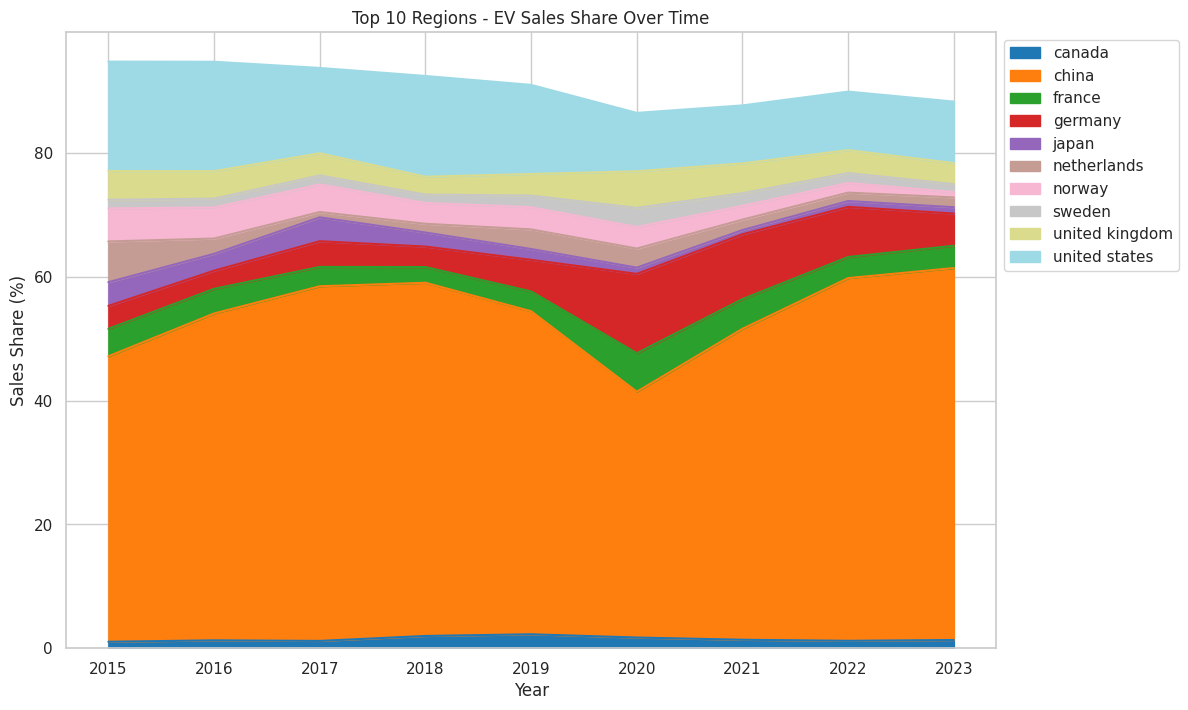

In [33]:
# --- Plot Top 10 ---
top_10_sales_share_pivot.plot(kind='area', stacked=True, figsize=(12,8), colormap='tab20')
plt.title('Top 10 Regions - EV Sales Share Over Time')
plt.xlabel('Year')
plt.ylabel('Sales Share (%)')
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.show()

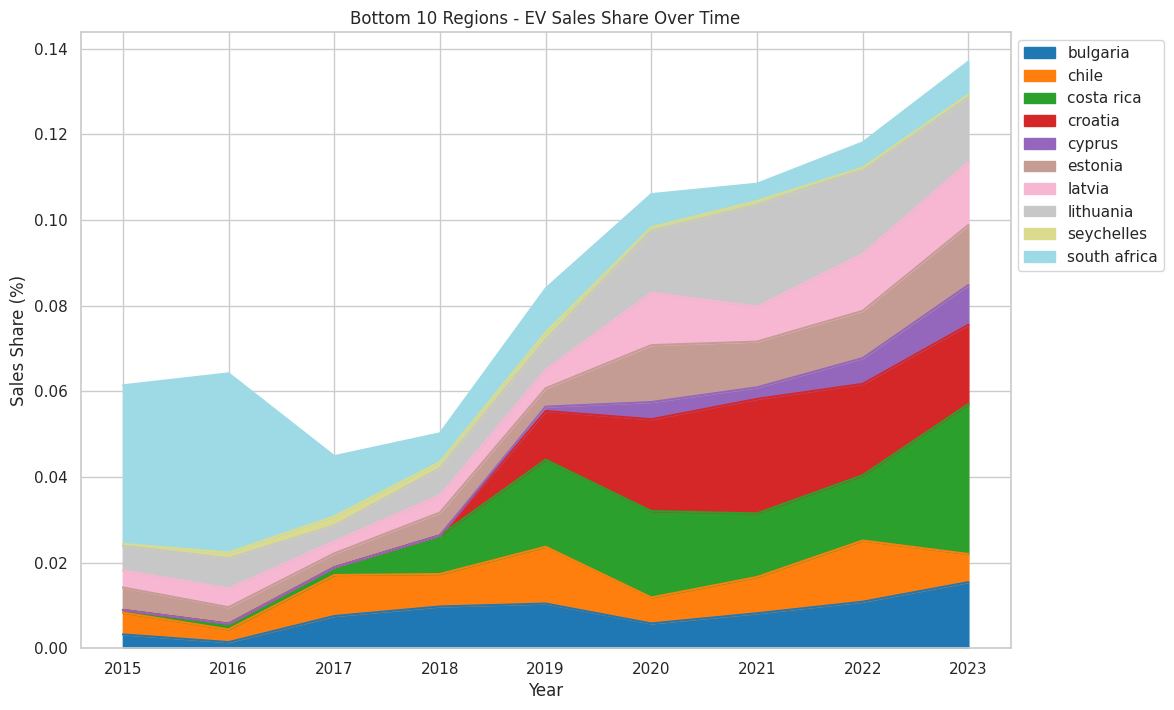

In [34]:
# --- Plot Bottom 10 ---
bottom_10_sales_share_pivot.plot(kind='area', stacked=True, figsize=(12,8), colormap='tab20')
plt.title('Bottom 10 Regions - EV Sales Share Over Time')
plt.xlabel('Year')
plt.ylabel('Sales Share (%)')
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.show()


In [35]:
# Filter for EV stock data
ev_stock = df_ev_data[df_ev_data['Parameter'] == 'ev stock']

# Exclude specific regions
excluded_regions = ['europe', 'european union', 'global']  # List of regions to exclude
historical_stock_filtered = ev_stock[~ev_stock['Region'].isin(excluded_regions)]

# Global stock per year
global_stock_yearly = historical_stock_filtered.groupby('Year')['Value'].sum().reset_index().rename(columns={'Value': 'Global_Stock'})

# Merge with regional data
regional_stock = historical_stock_filtered.groupby(['Year', 'Region'])['Value'].sum().reset_index()
regional_stock = pd.merge(regional_stock, global_stock_yearly, on='Year')
regional_stock['Stock_Share'] = (regional_stock['Value'] / regional_stock['Global_Stock']) * 100

# --- Calculate Average Stock Share and Select Top/Bottom 10 ---
avg_stock_share = regional_stock.groupby('Region')['Stock_Share'].mean().sort_values()
top_10_regions = avg_stock_share.tail(10).index
bottom_10_regions = avg_stock_share.head(10).index

# --- Filter Data for Top/Bottom 10 ---
top_10_stock_share = regional_stock[regional_stock['Region'].isin(top_10_regions)]
bottom_10_stock_share = regional_stock[regional_stock['Region'].isin(bottom_10_regions)]

# --- Pivot for plotting ---
top_10_stock_share_pivot = top_10_stock_share.pivot(index='Year', columns='Region', values='Stock_Share').fillna(0)
bottom_10_stock_share_pivot = bottom_10_stock_share.pivot(index='Year', columns='Region', values='Stock_Share').fillna(0)




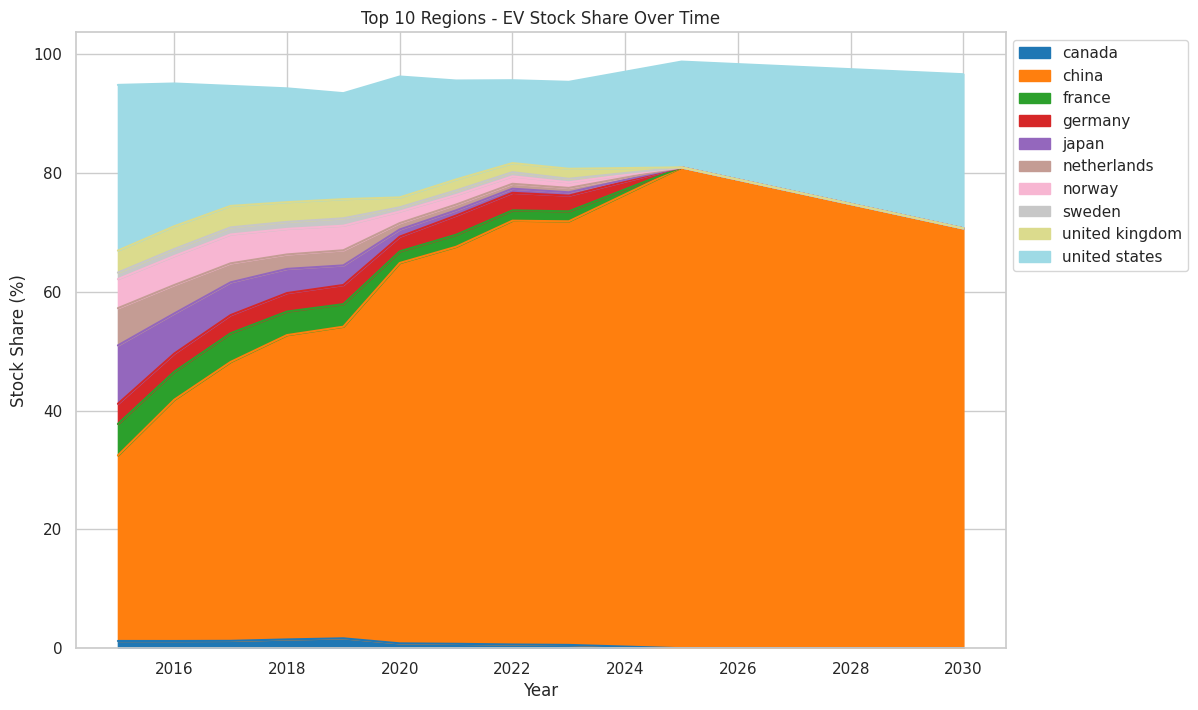

In [36]:
# --- Plot Top 10 Regions ---
top_10_stock_share_pivot.plot(kind='area', stacked=True, figsize=(12,8), colormap='tab20')
plt.title('Top 10 Regions - EV Stock Share Over Time')
plt.xlabel('Year')
plt.ylabel('Stock Share (%)')
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.grid(True)
plt.show()



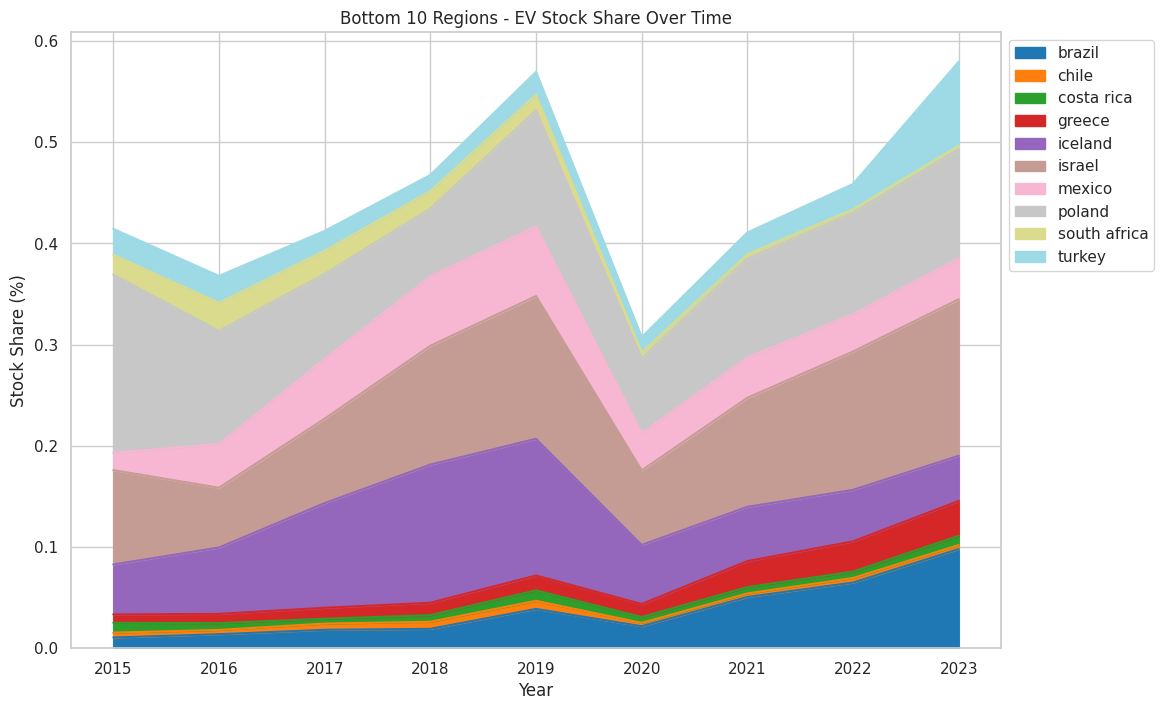

In [37]:
# --- Plot Bottom 10 Regions ---
bottom_10_stock_share_pivot.plot(kind='area', stacked=True, figsize=(12,8), colormap='tab20')
plt.title('Bottom 10 Regions - EV Stock Share Over Time')
plt.xlabel('Year')
plt.ylabel('Stock Share (%)')
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.grid(True)
plt.show()